In [4]:
!pip install  gdown

#### downloadig the labels

In [5]:
!gdown --id 1YXqEoWanjprjjSeSo8s1BtfhXPoll8mF
#https://drive.google.com/file/d/1YXqEoWanjprjjSeSo8s1BtfhXPoll8mF/view?usp=sharing

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YXqEoWanjprjjSeSo8s1BtfhXPoll8mF
To: /kaggle/working/combined_predictions_vgg16.csv
100%|██████████████████████████████████████| 29.5k/29.5k [00:00<00:00, 51.6MB/s]


##### dataset-v1

!gdown --id 13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36

#https://drive.google.com/file/d/13hXnqx4RGZtUL2u3V8CU6thsnO8tSR36/view?usp=sharing

!tar -xvf "FinalDataset-V1-t1.tar" -C "/kaggle/working"

##### dataset-v2

In [6]:
!gdown --id 1zLWeWcA7pBuj9-z3gE9ahhEAchhoMndk
#https://drive.google.com/file/d/1zLWeWcA7pBuj9-z3gE9ahhEAchhoMndk/view?usp=sharing
#https://drive.google.com/file/d/1zLWeWcA7pBuj9-z3gE9ahhEAchhoMndk/view?usp=sharing

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zLWeWcA7pBuj9-z3gE9ahhEAchhoMndk
To: /kaggle/working/FinalDataset-V2.tar
100%|███████████████████████████████████████| 82.2M/82.2M [00:00<00:00, 201MB/s]


In [7]:
!tar -xvf "FinalDataset-V2.tar" -C "/kaggle/working"

content/drive/MyDrive/Final Dataset-V2/
content/drive/MyDrive/Final Dataset-V2/Unlabeled/
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0895.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1555.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1643.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0511.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1580.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0590.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1620.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1243.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1533.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0562.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0529.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0584.jpg
content/drive/MyDrive/Final Dataset-V2/Unlabel

### Importing Libraries

In [8]:
!pip install imutils

In [9]:
# set the matplotlib backend so figures can be saved in the background
import matplotlib
import tensorflow as tf
from tqdm import tqdm
#matplotlib.use("Agg")
# import the necessary packages
#from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from skimage import color, io
from tensorflow.keras import layers, Model, utils 
from skimage import color, io
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from io import BytesIO
import time
from imutils import paths
import shutil
import itertools
import pandas as pd
from IPython.display import Image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Activation, Dense, Flatten, RepeatVector, Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D

unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tensorflow13GcsFileSystemE']


### creating the dataset into correct format

In [10]:
INIT_LR = 1e-1
BS = 8
EPOCHS = 500
IMG_PATH_BASE = "/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/" #content/drive/MyDrive/Final Dataset-V2/Unlabeled/
#IMG_PATH_BASE = "/kaggle/working/content/drive/MyDrive/Final Dataset- V1"
IMG_PATH_NORMAL = IMG_PATH_BASE+'/Normal'
IMG_PATH_ANOMALY = IMG_PATH_BASE+'/Anomaly'

test = os.listdir(IMG_PATH_BASE)
#print(test)

print("[INFO] loading images...")
imagePaths_base = list(paths.list_images(IMG_PATH_BASE))
print(len(imagePaths_base))
#imagePaths_normal = list(paths.list_images(IMG_PATH_NORMAL))
#imagePaths_anomaly = list(paths.list_images(IMG_PATH_ANOMALY))


print(len(imagePaths_base))
print("Number of data in the dataset")
#print(len(imagePaths_normal))
#print("Number of data in the anomaly class")
#print(len(imagePaths_anomaly))

vgg_img_width = 224
vgg_img_height = 224
VGG_SHAPE = (vgg_img_width, vgg_img_height,3)

[INFO] loading images...
2497
2497
Number of data in the dataset


## Image Preprocesing

### Preprocessing Utility Methods

In [11]:
def croppingImage(img):
    x=0
    w=325
    y=0
    h=640
    return img[x:w,y:h]

In [12]:
def normalizeImage(img):
    return cv2.normalize(img,None,alpha=0,beta=255,norm_type=cv2.NORM_INF)
 

In [13]:
def prepareImageForModel(img):
      tf.keras.applications.vgg16.preprocess_input(img)

In [14]:
dataset = []
#dataset = np.array([])
labels = []
#labels = np.array([])

In [15]:
df=pd.read_csv("combined_predictions_vgg16.csv")
df["Predicted_Class"]

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
         ...   
2492    Anomaly
2493    Anomaly
2494    Anomaly
2495    Anomaly
2496    Anomaly
Name: Predicted_Class, Length: 2497, dtype: object

In [16]:
for prediction in tqdm(df["Predicted_Class"]):
    if(prediction =="Normal"):
        labels.append(0)
    else:
        labels.append(1)
        

100%|██████████| 2497/2497 [00:00<00:00, 818984.76it/s]


In [17]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:

for imgP in tqdm(sorted(imagePaths_base)):
    print(imgP)
    
    image_normal = cv2.imread(imgP)
    image_normal =  croppingImage(image_normal)
    image_normal = cv2.resize(image_normal, (224, 224),interpolation = cv2.INTER_AREA)
    image_normal = image_normal/255.0
   
    dataset.append(image_normal)
    

  0%|          | 0/2497 [00:00<?, ?it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0004.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0005.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0006.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0007.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0008.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0009.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0010.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0011.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0012.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0013.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0014.jpg
/kaggle/working/content/drive/My

  1%|          | 16/2497 [00:00<00:16, 154.02it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0016.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0017.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0018.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0019.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0020.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0021.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0022.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0023.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0024.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0025.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0026.jpg
/kaggle/working/content/drive/My

  1%|▏         | 32/2497 [00:00<00:18, 132.45it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0033.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0034.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0035.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0036.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0037.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0038.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0039.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0040.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0041.jpg


  2%|▏         | 47/2497 [00:00<00:17, 139.47it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0042.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0043.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0044.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0045.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0046.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0047.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0048.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0049.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0050.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0051.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0052.jpg
/kaggle/working/content/drive/My

  3%|▎         | 64/2497 [00:00<00:16, 148.35it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0063.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0064.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0065.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0066.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0067.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0068.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0069.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0070.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0071.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0072.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0073.jpg
/kaggle/working/content/drive/My

  3%|▎         | 80/2497 [00:00<00:15, 151.60it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0076.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0077.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0078.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0079.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0080.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0081.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0082.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0083.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0084.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0085.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0086.jpg
/kaggle/working/content/drive/My

  4%|▍         | 96/2497 [00:00<00:16, 142.08it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0093.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0094.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0095.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0096.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0097.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0098.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0099.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0100.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0101.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0102.jpg


  4%|▍         | 111/2497 [00:00<00:16, 143.68it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0103.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0104.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0105.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0106.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0107.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0108.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0109.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0110.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0111.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0112.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0113.jpg
/kaggle/working/content/drive/My

  5%|▌         | 127/2497 [00:00<00:15, 148.50it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0123.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0124.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0125.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0126.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0127.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0128.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0129.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0130.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0131.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0132.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0133.jpg
/kaggle/working/content/drive/My

  6%|▌         | 144/2497 [00:00<00:15, 152.85it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0135.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0136.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0137.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0138.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0139.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0140.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0141.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0142.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0143.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0144.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0145.jpg
/kaggle/working/content/drive/My

  6%|▋         | 161/2497 [00:01<00:14, 155.87it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0156.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0157.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0158.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0159.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0160.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0161.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0162.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0163.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0164.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0165.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0166.jpg
/kaggle/working/content/drive/My

  7%|▋         | 178/2497 [00:01<00:14, 158.61it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0168.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0169.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0170.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0171.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0172.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0173.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0174.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0175.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0176.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0177.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0178.jpg
/kaggle/working/content/drive/My

  8%|▊         | 195/2497 [00:01<00:14, 159.71it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0190.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0191.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0192.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0193.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0194.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0195.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0196.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0197.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0198.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0199.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0200.jpg


  8%|▊         | 212/2497 [00:01<00:14, 159.71it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0201.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0202.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0203.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0204.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0205.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0206.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0207.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0208.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0209.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0210.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0211.jpg
/kaggle/working/content/drive/My

  9%|▉         | 229/2497 [00:01<00:14, 160.97it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0223.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0224.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0225.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0226.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0227.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0228.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0229.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0230.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0231.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0232.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0233.jpg


 10%|▉         | 246/2497 [00:01<00:14, 159.09it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0234.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0235.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0236.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0237.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0238.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0239.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0240.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0241.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0242.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0243.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0244.jpg
/kaggle/working/content/drive/My

 11%|█         | 279/2497 [00:01<00:13, 159.18it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0266.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0267.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0268.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0269.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0270.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0271.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0272.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0273.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0274.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0275.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0276.jpg
/kaggle/working/content/drive/My

 12%|█▏        | 312/2497 [00:02<00:13, 160.58it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0299.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0300.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0301.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0302.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0303.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0304.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0305.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0306.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0307.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0308.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0309.jpg
/kaggle/working/content/drive/My

 14%|█▍        | 346/2497 [00:02<00:13, 160.36it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0332.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0333.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0334.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0335.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0336.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0337.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0338.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0339.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0340.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0341.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0342.jpg
/kaggle/working/content/drive/My

 15%|█▌        | 379/2497 [00:02<00:13, 158.07it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0364.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0365.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0366.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0367.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0368.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0369.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0370.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0371.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0372.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0373.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0374.jpg
/kaggle/working/content/drive/My

 16%|█▋        | 411/2497 [00:02<00:13, 155.98it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0395.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0396.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0397.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0398.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0399.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0400.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0401.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0402.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0403.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0404.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0405.jpg
/kaggle/working/content/drive/My

 17%|█▋        | 427/2497 [00:02<00:13, 155.15it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0426.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0427.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0428.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0429.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0430.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0431.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0432.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0433.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0434.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0435.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0436.jpg
/kaggle/working/content/drive/My

 18%|█▊        | 443/2497 [00:02<00:15, 134.88it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0443.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0444.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0445.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0446.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0447.jpg


 18%|█▊        | 457/2497 [00:03<00:16, 124.85it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0448.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0449.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0450.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0451.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0452.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0453.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0454.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0455.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0456.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0457.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0458.jpg
/kaggle/working/content/drive/My

 19%|█▉        | 470/2497 [00:03<00:17, 118.49it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0470.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0471.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0472.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0473.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0474.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0475.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0476.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0477.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0478.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0479.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0480.jpg
/kaggle/working/content/drive/My

 19%|█▉        | 483/2497 [00:03<00:17, 114.47it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0485.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0486.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0487.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0488.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0489.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0490.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0491.jpg


 20%|█▉        | 495/2497 [00:03<00:17, 112.58it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0492.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0493.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0494.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0495.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0496.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0497.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0498.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0499.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0500.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0501.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0502.jpg
/kaggle/working/content/drive/My

 20%|██        | 507/2497 [00:03<00:18, 109.70it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0507.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0508.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0509.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0510.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0511.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0512.jpg


 21%|██        | 519/2497 [00:03<00:18, 106.54it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0513.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0514.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0515.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0516.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0517.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0518.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0519.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0520.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0521.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0522.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0523.jpg
/kaggle/working/content/drive/My

 22%|██▏       | 541/2497 [00:03<00:18, 103.71it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0534.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0535.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0536.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0537.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0538.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0539.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0540.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0541.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0542.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0543.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0544.jpg
/kaggle/working/content/drive/My

 23%|██▎       | 563/2497 [00:04<00:18, 102.55it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0556.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0557.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0558.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0559.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0560.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0561.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0562.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0563.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0564.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0565.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0566.jpg
/kaggle/working/content/drive/My

 23%|██▎       | 585/2497 [00:04<00:18, 102.94it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0577.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0578.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0579.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0580.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0581.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0582.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0583.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0584.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0585.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0586.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0587.jpg
/kaggle/working/content/drive/My

 25%|██▍       | 617/2497 [00:04<00:14, 128.67it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0602.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0603.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0604.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0605.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0606.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0607.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0608.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0609.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0610.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0611.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0612.jpg
/kaggle/working/content/drive/My

 26%|██▌       | 648/2497 [00:04<00:13, 140.13it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0634.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0635.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0636.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0637.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0638.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0639.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0640.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0641.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0642.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0643.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0644.jpg
/kaggle/working/content/drive/My

 27%|██▋       | 680/2497 [00:04<00:12, 148.31it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0665.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0666.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0667.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0668.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0669.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0670.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0671.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0672.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0673.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0674.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0675.jpg
/kaggle/working/content/drive/My

 29%|██▊       | 712/2497 [00:05<00:11, 153.03it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0697.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0698.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0699.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0700.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0701.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0702.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0703.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0704.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0705.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0706.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0707.jpg
/kaggle/working/content/drive/My

 29%|██▉       | 728/2497 [00:05<00:11, 151.57it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0729.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0730.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0731.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0732.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0733.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0734.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0735.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0736.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0737.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0738.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0739.jpg
/kaggle/working/content/drive/My

 30%|██▉       | 744/2497 [00:05<00:11, 150.88it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0748.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0749.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0750.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0751.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0752.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0753.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0754.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0755.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0756.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0757.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0758.jpg
/kaggle/working/content/drive/My

 30%|███       | 760/2497 [00:05<00:11, 150.80it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0760.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0761.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0762.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0763.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0764.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0765.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0766.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0767.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0768.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0769.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0770.jpg
/kaggle/working/content/drive/My

 31%|███       | 776/2497 [00:05<00:11, 151.86it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0779.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0780.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0781.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0782.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0783.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0784.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0785.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0786.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0787.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0788.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0789.jpg
/kaggle/working/content/drive/My

 32%|███▏      | 792/2497 [00:05<00:11, 150.55it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0791.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0792.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0793.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0794.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0795.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0796.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0797.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0798.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0799.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0800.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0801.jpg
/kaggle/working/content/drive/My

 32%|███▏      | 808/2497 [00:05<00:11, 150.53it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0809.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0810.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0811.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0812.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0813.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0814.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0815.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0816.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0817.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0818.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0819.jpg
/kaggle/working/content/drive/My

 33%|███▎      | 824/2497 [00:05<00:11, 151.63it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0822.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0823.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0824.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0825.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0826.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0827.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0828.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0829.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0830.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0831.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0832.jpg
/kaggle/working/content/drive/My

 34%|███▎      | 840/2497 [00:05<00:10, 152.14it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0840.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0841.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0842.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0843.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0844.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0845.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0846.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0847.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0848.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0849.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0850.jpg
/kaggle/working/content/drive/My

 34%|███▍      | 856/2497 [00:06<00:10, 152.43it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0853.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0854.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0855.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0856.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0857.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0858.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0859.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0860.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0861.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0862.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0863.jpg
/kaggle/working/content/drive/My

 35%|███▍      | 872/2497 [00:06<00:10, 151.61it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0871.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0872.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0873.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0874.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0875.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0876.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0877.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0878.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0879.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0880.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0881.jpg
/kaggle/working/content/drive/My

 36%|███▌      | 888/2497 [00:06<00:10, 150.59it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0884.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0885.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0886.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0887.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0888.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0889.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0890.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0891.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0892.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0893.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0894.jpg
/kaggle/working/content/drive/My

 36%|███▌      | 904/2497 [00:06<00:10, 150.44it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0902.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0903.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0904.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0905.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0906.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0907.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0908.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0909.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0910.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0911.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0912.jpg
/kaggle/working/content/drive/My

 37%|███▋      | 920/2497 [00:06<00:10, 153.13it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0915.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0916.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0917.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0918.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0919.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0920.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0921.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0922.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0923.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0924.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0925.jpg
/kaggle/working/content/drive/My

 37%|███▋      | 936/2497 [00:06<00:10, 153.07it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0934.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0935.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0936.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0937.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0938.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0939.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0940.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0941.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0942.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0943.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0944.jpg
/kaggle/working/content/drive/My

 38%|███▊      | 952/2497 [00:06<00:10, 151.88it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0947.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0948.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0949.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0950.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0951.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0952.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0953.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0954.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0955.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0956.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0957.jpg
/kaggle/working/content/drive/My

 39%|███▉      | 968/2497 [00:06<00:10, 151.83it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0965.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0966.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0967.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0968.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0969.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0970.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0971.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0972.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0973.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0974.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0975.jpg
/kaggle/working/content/drive/My

 39%|███▉      | 984/2497 [00:06<00:10, 151.20it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0978.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0979.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0980.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0981.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0982.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0983.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0984.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0985.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0986.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0987.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0988.jpg
/kaggle/working/content/drive/My

 40%|████      | 1000/2497 [00:07<00:09, 152.10it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0996.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0997.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0998.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_0999.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1000.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1001.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1002.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1003.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1004.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1005.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1006.jpg
/kaggle/working/content/drive/My

 41%|████      | 1016/2497 [00:07<00:09, 152.78it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1009.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1010.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1011.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1012.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1013.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1014.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1015.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1016.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1017.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1018.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1019.jpg
/kaggle/working/content/drive/My

 41%|████▏     | 1032/2497 [00:07<00:09, 153.30it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1028.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1029.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1030.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1031.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1032.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1033.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1034.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1035.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1036.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1037.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1038.jpg
/kaggle/working/content/drive/My

 42%|████▏     | 1048/2497 [00:07<00:09, 154.57it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1041.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1042.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1043.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1044.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1045.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1046.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1047.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1048.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1049.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1050.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1051.jpg
/kaggle/working/content/drive/My

 43%|████▎     | 1064/2497 [00:07<00:09, 155.31it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1060.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1061.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1062.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1063.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1064.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1065.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1066.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1067.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1068.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1069.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1070.jpg
/kaggle/working/content/drive/My

 43%|████▎     | 1080/2497 [00:07<00:09, 155.37it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1073.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1074.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1075.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1076.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1077.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1078.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1079.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1080.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1081.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1082.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1083.jpg
/kaggle/working/content/drive/My

 44%|████▍     | 1096/2497 [00:07<00:09, 153.01it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1092.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1093.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1094.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1095.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1096.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1097.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1098.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1099.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1100.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1101.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1102.jpg
/kaggle/working/content/drive/My

 45%|████▍     | 1112/2497 [00:07<00:09, 153.80it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1104.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1105.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1106.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1107.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1108.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1109.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1110.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1111.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1112.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1113.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1114.jpg
/kaggle/working/content/drive/My

 45%|████▌     | 1128/2497 [00:07<00:08, 152.71it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1123.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1124.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1125.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1126.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1127.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1128.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1129.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1130.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1131.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1132.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1133.jpg
/kaggle/working/content/drive/My

 46%|████▌     | 1144/2497 [00:07<00:08, 152.30it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1135.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1136.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1137.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1138.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1139.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1140.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1141.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1142.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1143.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1144.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1145.jpg
/kaggle/working/content/drive/My

 46%|████▋     | 1160/2497 [00:08<00:08, 153.28it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1154.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1155.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1156.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1157.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1158.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1159.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1160.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1161.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1162.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1163.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1164.jpg
/kaggle/working/content/drive/My

 47%|████▋     | 1176/2497 [00:08<00:08, 153.58it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1167.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1168.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1169.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1170.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1171.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1172.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1173.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1174.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1175.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1176.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1177.jpg
/kaggle/working/content/drive/My

 48%|████▊     | 1192/2497 [00:08<00:08, 154.14it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1186.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1187.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1188.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1189.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1190.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1191.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1192.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1193.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1194.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1195.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1196.jpg
/kaggle/working/content/drive/My

 48%|████▊     | 1208/2497 [00:08<00:08, 151.94it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1199.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1200.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1201.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1202.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1203.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1204.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1205.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1206.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1207.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1208.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1209.jpg
/kaggle/working/content/drive/My

 49%|████▉     | 1224/2497 [00:08<00:08, 152.77it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1217.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1218.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1219.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1220.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1221.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1222.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1223.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1224.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1225.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1226.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1227.jpg
/kaggle/working/content/drive/My

 50%|████▉     | 1240/2497 [00:08<00:08, 152.64it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1230.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1231.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1232.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1233.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1234.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1235.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1236.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1237.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1238.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1239.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1240.jpg
/kaggle/working/content/drive/My

 51%|█████     | 1271/2497 [00:08<00:08, 146.13it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1260.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1261.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1262.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1263.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1264.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1265.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1266.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1267.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1268.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1269.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1270.jpg
/kaggle/working/content/drive/My

 52%|█████▏    | 1301/2497 [00:09<00:08, 142.87it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1288.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1289.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1290.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1291.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1292.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1293.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1294.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1295.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1296.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1297.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1298.jpg
/kaggle/working/content/drive/My

 53%|█████▎    | 1333/2497 [00:09<00:07, 147.45it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1318.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1319.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1320.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1321.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1322.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1323.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1324.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1325.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1326.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1327.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1328.jpg
/kaggle/working/content/drive/My

 54%|█████▍    | 1349/2497 [00:09<00:07, 148.63it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1349.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1350.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1351.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1352.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1353.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1354.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1355.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1356.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1357.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1358.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1359.jpg
/kaggle/working/content/drive/My

 55%|█████▍    | 1365/2497 [00:09<00:07, 149.50it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1368.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1369.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1370.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1371.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1372.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1373.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1374.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1375.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1376.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1377.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1378.jpg
/kaggle/working/content/drive/My

 55%|█████▌    | 1380/2497 [00:09<00:07, 148.79it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1380.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1381.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1382.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1383.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1384.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1385.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1386.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1387.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1388.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1389.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1390.jpg
/kaggle/working/content/drive/My

 56%|█████▌    | 1395/2497 [00:09<00:07, 148.56it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1398.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1399.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1400.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1401.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1402.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1403.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1404.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1405.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1406.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1407.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1408.jpg
/kaggle/working/content/drive/My

 56%|█████▋    | 1410/2497 [00:09<00:07, 148.81it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1411.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1412.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1413.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1414.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1415.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1416.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1417.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1418.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1419.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1420.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1421.jpg
/kaggle/working/content/drive/My

 57%|█████▋    | 1426/2497 [00:09<00:07, 151.31it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1429.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1430.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1431.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1432.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1433.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1434.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1435.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1436.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1437.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1438.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1439.jpg
/kaggle/working/content/drive/My

 58%|█████▊    | 1442/2497 [00:09<00:06, 152.35it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1443.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1444.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1445.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1446.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1447.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1448.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1449.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1450.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1451.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1452.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1453.jpg
/kaggle/working/content/drive/My

 58%|█████▊    | 1458/2497 [00:10<00:07, 145.62it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1460.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1461.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1462.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1463.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1464.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1465.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1466.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1467.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1468.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1469.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1470.jpg


 59%|█████▉    | 1473/2497 [00:10<00:07, 142.97it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1471.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1472.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1473.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1474.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1475.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1476.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1477.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1478.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1479.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1480.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1481.jpg
/kaggle/working/content/drive/My

 60%|█████▉    | 1488/2497 [00:10<00:07, 134.75it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1485.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1486.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1487.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1488.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1489.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1490.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1491.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1492.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1493.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1494.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1495.jpg


 60%|██████    | 1504/2497 [00:10<00:07, 139.25it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1496.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1497.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1498.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1499.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1500.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1501.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1502.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1503.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1504.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1505.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1506.jpg
/kaggle/working/content/drive/My

 61%|██████    | 1519/2497 [00:10<00:07, 138.54it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1515.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1516.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1517.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1518.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1519.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1520.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1521.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1522.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1523.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1524.jpg


 61%|██████▏   | 1533/2497 [00:10<00:06, 138.41it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1525.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1526.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1527.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1528.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1529.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1530.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1531.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1532.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1533.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1534.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1535.jpg
/kaggle/working/content/drive/My

 62%|██████▏   | 1548/2497 [00:10<00:06, 141.41it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1544.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1545.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1546.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1547.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1548.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1549.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1550.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1551.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1552.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1553.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1554.jpg


 63%|██████▎   | 1563/2497 [00:10<00:06, 143.52it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1555.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1556.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1557.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1558.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1559.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1560.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1561.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1562.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1563.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1564.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1565.jpg
/kaggle/working/content/drive/My

 63%|██████▎   | 1578/2497 [00:10<00:06, 144.23it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1574.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1575.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1576.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1577.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1578.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1579.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1580.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1581.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1582.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1583.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1584.jpg


 64%|██████▍   | 1593/2497 [00:11<00:06, 145.82it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1585.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1586.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1587.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1588.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1589.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1590.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1591.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1592.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1593.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1594.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1595.jpg
/kaggle/working/content/drive/My

 64%|██████▍   | 1608/2497 [00:11<00:06, 145.76it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1604.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1605.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1606.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1607.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1608.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1609.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1610.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1611.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1612.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1613.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1614.jpg


 65%|██████▌   | 1624/2497 [00:11<00:05, 147.79it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1615.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1616.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1617.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1618.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1619.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1620.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1621.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1622.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1623.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1624.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1625.jpg
/kaggle/working/content/drive/My

 66%|██████▌   | 1640/2497 [00:11<00:05, 149.67it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1635.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1636.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1637.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1638.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1639.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1640.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1641.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1642.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1643.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1644.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1645.jpg
/kaggle/working/content/drive/My

 66%|██████▋   | 1656/2497 [00:11<00:05, 150.69it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1647.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1648.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1649.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1650.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1651.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1652.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1653.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1654.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1655.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1656.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1657.jpg
/kaggle/working/content/drive/My

 67%|██████▋   | 1672/2497 [00:11<00:05, 149.13it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1666.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1667.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1668.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1669.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1670.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1671.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1672.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1673.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1674.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1675.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1676.jpg


 68%|██████▊   | 1687/2497 [00:11<00:05, 146.47it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1677.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1678.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1679.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1680.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1681.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1682.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1683.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1684.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1685.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1686.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1687.jpg
/kaggle/working/content/drive/My

 69%|██████▉   | 1717/2497 [00:11<00:05, 144.64it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1706.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1707.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1708.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1709.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1710.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1711.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1712.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1713.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1714.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1715.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1716.jpg
/kaggle/working/content/drive/My

 70%|███████   | 1749/2497 [00:12<00:04, 149.69it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1736.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1737.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1738.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1739.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1740.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1741.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1742.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1743.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1744.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1745.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1746.jpg
/kaggle/working/content/drive/My

 71%|███████▏  | 1780/2497 [00:12<00:04, 150.30it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1767.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1768.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1769.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1770.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1771.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1772.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1773.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1774.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1775.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1776.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1777.jpg
/kaggle/working/content/drive/My

 73%|███████▎  | 1812/2497 [00:12<00:04, 152.01it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1799.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1800.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1801.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1802.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1803.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1804.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1805.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1806.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1807.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1808.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1809.jpg
/kaggle/working/content/drive/My

 74%|███████▍  | 1844/2497 [00:12<00:04, 151.44it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1830.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1831.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1832.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1833.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1834.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1835.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1836.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1837.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1838.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1839.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1840.jpg
/kaggle/working/content/drive/My

 75%|███████▌  | 1876/2497 [00:12<00:04, 153.47it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1861.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1862.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1863.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1864.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1865.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1866.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1867.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1868.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1869.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1870.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1871.jpg
/kaggle/working/content/drive/My

 76%|███████▋  | 1908/2497 [00:13<00:03, 154.11it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1892.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1893.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1894.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1895.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1896.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1897.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1898.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1899.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1900.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1901.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1902.jpg
/kaggle/working/content/drive/My

 77%|███████▋  | 1924/2497 [00:13<00:03, 150.75it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1923.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1924.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1925.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1926.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1927.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1928.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1929.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1930.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1931.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1932.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1933.jpg
/kaggle/working/content/drive/My

 78%|███████▊  | 1940/2497 [00:13<00:03, 152.63it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1944.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1945.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1946.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1947.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1948.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1949.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1950.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1951.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1952.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1953.jpg


 78%|███████▊  | 1956/2497 [00:13<00:03, 152.80it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1954.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1955.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1956.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1957.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1958.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1959.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1960.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1961.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1962.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1963.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1964.jpg
/kaggle/working/content/drive/My

 79%|███████▉  | 1972/2497 [00:13<00:03, 152.94it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1976.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1977.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1978.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1979.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1980.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1981.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1982.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1983.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1984.jpg


 80%|███████▉  | 1988/2497 [00:13<00:03, 152.00it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1985.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1986.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1987.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1988.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1989.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1990.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1991.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1992.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1993.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1994.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_1995.jpg
/kaggle/working/content/drive/My

 80%|████████  | 2004/2497 [00:13<00:03, 150.89it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2007.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2008.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2009.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2010.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2011.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2012.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2013.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2014.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2015.jpg


 81%|████████  | 2020/2497 [00:13<00:03, 152.77it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2016.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2017.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2018.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2019.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2020.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2021.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2022.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2023.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2024.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2025.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2026.jpg
/kaggle/working/content/drive/My

 82%|████████▏ | 2036/2497 [00:13<00:03, 153.55it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2039.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2040.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2041.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2042.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2043.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2044.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2045.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2046.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2047.jpg


 82%|████████▏ | 2052/2497 [00:14<00:02, 154.29it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2048.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2049.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2050.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2051.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2052.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2053.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2054.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2055.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2056.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2057.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2058.jpg
/kaggle/working/content/drive/My

 83%|████████▎ | 2068/2497 [00:14<00:02, 149.66it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2070.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2071.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2072.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2073.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2074.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2075.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2076.jpg


 83%|████████▎ | 2084/2497 [00:14<00:02, 146.26it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2077.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2078.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2079.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2080.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2081.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2082.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2083.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2084.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2085.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2086.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2087.jpg
/kaggle/working/content/drive/My

 84%|████████▍ | 2100/2497 [00:14<00:02, 148.49it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2099.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2100.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2101.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2102.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2103.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2104.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2105.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2106.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2107.jpg


 85%|████████▍ | 2116/2497 [00:14<00:02, 150.83it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2108.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2109.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2110.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2111.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2112.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2113.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2114.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2115.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2116.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2117.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2118.jpg
/kaggle/working/content/drive/My

 85%|████████▌ | 2132/2497 [00:14<00:02, 152.22it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2131.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2132.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2133.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2134.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2135.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2136.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2137.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2138.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2139.jpg


 86%|████████▌ | 2148/2497 [00:14<00:02, 152.44it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2140.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2141.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2142.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2143.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2144.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2145.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2146.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2147.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2148.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2149.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2150.jpg
/kaggle/working/content/drive/My

 87%|████████▋ | 2164/2497 [00:14<00:02, 152.71it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2163.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2164.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2165.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2166.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2167.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2168.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2169.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2170.jpg


 87%|████████▋ | 2180/2497 [00:14<00:02, 153.61it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2171.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2172.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2173.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2174.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2175.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2176.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2177.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2178.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2179.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2180.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2181.jpg
/kaggle/working/content/drive/My

 88%|████████▊ | 2196/2497 [00:15<00:01, 154.18it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2195.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2196.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2197.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2198.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2199.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2200.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2201.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2202.jpg


 89%|████████▊ | 2212/2497 [00:15<00:01, 154.51it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2203.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2204.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2205.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2206.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2207.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2208.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2209.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2210.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2211.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2212.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2213.jpg
/kaggle/working/content/drive/My

 89%|████████▉ | 2228/2497 [00:15<00:01, 153.36it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2227.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2228.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2229.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2230.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2231.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2232.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2233.jpg


 90%|████████▉ | 2244/2497 [00:15<00:01, 153.28it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2234.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2235.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2236.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2237.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2238.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2239.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2240.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2241.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2242.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2243.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2244.jpg
/kaggle/working/content/drive/My

 91%|█████████ | 2260/2497 [00:15<00:01, 154.74it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2258.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2259.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2260.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2261.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2262.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2263.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2264.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2265.jpg


 91%|█████████ | 2277/2497 [00:15<00:01, 156.78it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2266.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2267.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2268.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2269.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2270.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2271.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2272.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2273.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2274.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2275.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2276.jpg
/kaggle/working/content/drive/My

 92%|█████████▏| 2293/2497 [00:15<00:01, 154.76it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2290.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2291.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2292.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2293.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2294.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2295.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2296.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2297.jpg


 92%|█████████▏| 2309/2497 [00:15<00:01, 154.27it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2298.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2299.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2300.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2301.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2302.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2303.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2304.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2305.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2306.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2307.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2308.jpg
/kaggle/working/content/drive/My

 93%|█████████▎| 2325/2497 [00:15<00:01, 154.17it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2321.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2322.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2323.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2324.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2325.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2326.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2327.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2328.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2329.jpg


 94%|█████████▍| 2341/2497 [00:15<00:01, 152.35it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2330.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2331.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2332.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2333.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2334.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2335.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2336.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2337.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2338.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2339.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2340.jpg
/kaggle/working/content/drive/My

 95%|█████████▌| 2373/2497 [00:16<00:00, 151.31it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2361.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2362.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2363.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2364.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2365.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2366.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2367.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2368.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2369.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2370.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2371.jpg
/kaggle/working/content/drive/My

 96%|█████████▋| 2405/2497 [00:16<00:00, 150.11it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2392.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2393.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2394.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2395.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2396.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2397.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2398.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2399.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2400.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2401.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2402.jpg
/kaggle/working/content/drive/My

 98%|█████████▊| 2436/2497 [00:16<00:00, 147.56it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2422.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2423.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2424.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2425.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2426.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2427.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2428.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2429.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2430.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2431.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2432.jpg
/kaggle/working/content/drive/My

 99%|█████████▉| 2467/2497 [00:16<00:00, 147.15it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2452.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2453.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2454.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2455.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2456.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2457.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2458.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2459.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2460.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2461.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2462.jpg
/kaggle/working/content/drive/My

100%|██████████| 2497/2497 [00:17<00:00, 146.66it/s]

/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2482.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2483.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2484.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2485.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2486.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2487.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2488.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2489.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2490.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2491.jpg
/kaggle/working/content/drive/MyDrive/Final Dataset-V2/Unlabeled/Deforestation_2492.jpg
/kaggle/working/content/drive/My


for imgP in tqdm(imagePaths_normal):
    
    image_normal = cv2.imread(imgP)
    image_normal =  croppingImage(image_normal)
    image_normal = cv2.resize(image_normal, (224, 224),interpolation = cv2.INTER_AREA)
   
    dataset.append(image_normal)
    labels.append(0)
    
print(labels)

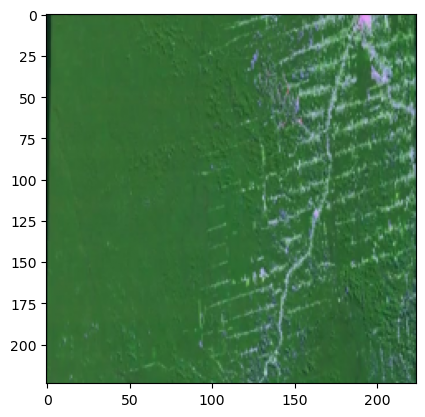

In [19]:

plt.grid(False)
plt.imshow(dataset[2496])

In [20]:
len(dataset)
dataset = np.asarray(dataset)
print(dataset.shape)


len(labels)
labels = np.asarray(labels)
print(labels)

(2497, 224, 224, 3)
[0 0 0 ... 1 1 1]


In [21]:
print(dataset.shape)
print(labels[2496])

(2497, 224, 224, 3)
1


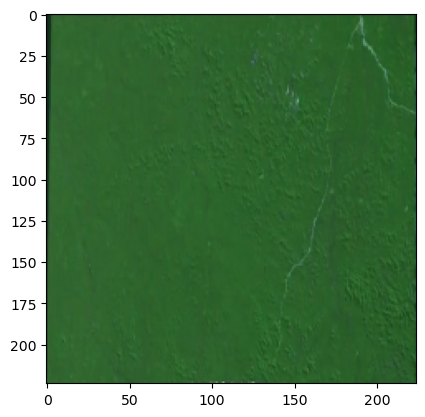

In [22]:
plt.imshow(dataset[1400])


In [23]:
dataset.shape

(2497, 224, 224, 3)

# Feature Extraction

# 1. ResNET 50


In [24]:
vgg = tf.keras.applications.VGG16(include_top=False, #to remove the classification layers
                                          weights='imagenet', #trains the model using imagenet weights
                                          input_shape=VGG_SHAPE #define the input shape of the model
                                          )
 
for layer in vgg.layers:
    layer.trainable = False
  #Convert the model into a sequential model
model = Sequential()(vgg.layers[-1].output)
#Add GlobalMaxPooling2D layer for dimension reduction
model = GlobalMaxPooling2D()(model)
model = Model(inputs=vgg.inputs, outputs=model)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Adding a trainable fully connected layer for classification.

In [26]:
vggModel = Sequential()
vggModel.add(model)
vggModel.add(Dense(512, activation='relu', input_dim=(None,512)))
vggModel.add(Dense(1, activation='sigmoid'))

In [27]:
vggModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 512)               14714688  
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
_________________________________________________________________


************************************

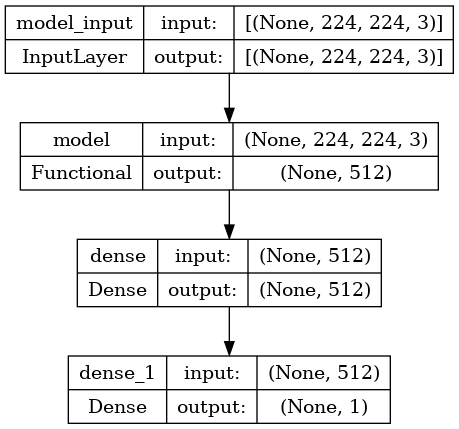

In [28]:
utils.plot_model(vggModel, show_shapes=True, show_layer_names=True)

## adding weights

* weights are added in order to avoid class imbalance


* weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(trainY),
                               y= trainY


In [29]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(class_weight ='balanced', 
                               classes= np.unique(labels),
                               y= labels)


                               
                               
cw = dict(zip( np.unique(labels), weights))
print(cw)

{0: 0.6803814713896458, 1: 1.88595166163142}


In [30]:
from keras import optimizers
vggModel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [31]:
history = vggModel.fit(dataset, labels,class_weight=cw, epochs=30)

Epoch 1/30
79/79 [==============================] - 12s 73ms/step - loss: 0.6045 - accuracy: 0.7749
Epoch 2/30
79/79 [==============================] - 6s 70ms/step - loss: 0.5521 - accuracy: 0.8266
Epoch 3/30
79/79 [==============================] - 6s 70ms/step - loss: 0.5378 - accuracy: 0.8010
Epoch 4/30
79/79 [==============================] - 5s 69ms/step - loss: 0.5270 - accuracy: 0.8302
Epoch 5/30
79/79 [==============================] - 6s 70ms/step - loss: 0.5141 - accuracy: 0.8310
Epoch 6/30
79/79 [==============================] - 6s 70ms/step - loss: 0.5087 - accuracy: 0.8222
Epoch 7/30
79/79 [==============================] - 6s 71ms/step - loss: 0.5060 - accuracy: 0.8034
Epoch 8/30
79/79 [==============================] - 5s 70ms/step - loss: 0.4975 - accuracy: 0.7829
Epoch 9/30
79/79 [==============================] - 5s 69ms/step - loss: 0.4838 - accuracy: 0.8414
Epoch 10/30
79/79 [==============================] - 5s 69ms/step - loss: 0.4874 - accuracy: 0.7873
Epoch 11

### Plot the Training and Vaidation accuracy 

In [32]:
history.history['accuracy']  

[0.774929940700531,
 0.8265919089317322,
 0.8009611368179321,
 0.8301962614059448,
 0.8309971690177917,
 0.8221866488456726,
 0.8033640384674072,
 0.7829395532608032,
 0.8414096832275391,
 0.7873448133468628,
 0.832999587059021,
 0.8342010378837585,
 0.839006781578064,
 0.8782538771629333,
 0.8462154865264893,
 0.838205873966217,
 0.8426111340522766,
 0.8538246154785156,
 0.8634361028671265,
 0.838205873966217,
 0.8546255230903625,
 0.8902683258056641,
 0.8217861652374268,
 0.8746495842933655,
 0.8594313263893127,
 0.8009611368179321,
 0.8546255230903625,
 0.8253904581069946,
 0.8422106504440308,
 0.8630356192588806]

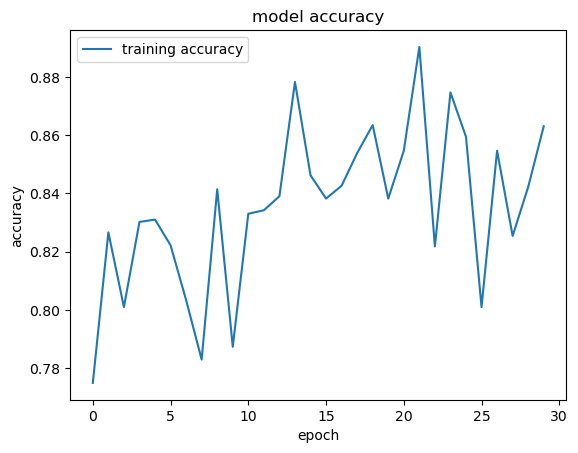

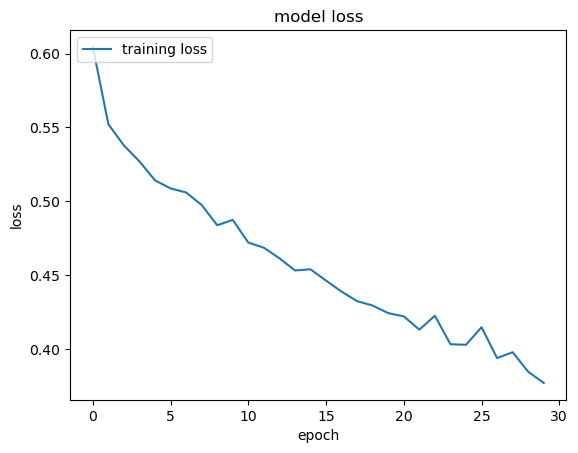

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss'], loc='upper left')

### Adding confusion matrix for the dataset


#### Get Model predictions

In [34]:
x= dataset



In [35]:


# predictions for the data (2500 images)
trure_targets =  labels

#confusion_matrix(trure_targets, predX)

In [36]:
predictions =[]
predX=vggModel.predict(x)

for pred in predX:
    #print(pred.shape)
    
    if(pred>0 and pred<=0.5):
        predictions.append(0)
    else:
        predictions.append(1)
    

79/79 [==============================] - 5s 65ms/step


In [37]:
predictions =  np.asarray(predictions)
print(predictions.shape)
print(predictions[2000])
print(labels[2000])

print(predictions[2012])
print(labels[2012])

(2497,)
1
1
1
1


model.predict(
    trainX
)

<Axes: >

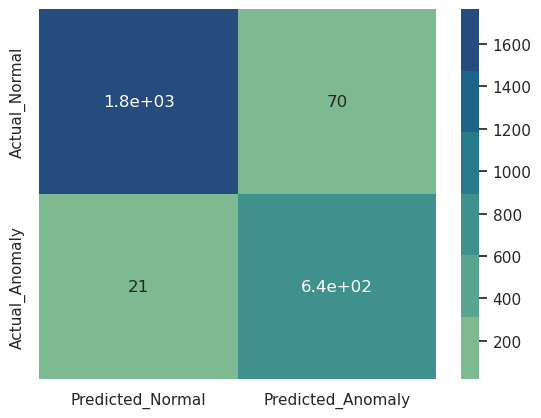

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
colorMap = sns.color_palette("crest")  



data = confusion_matrix(labels, predictions,labels=[0,1])
df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
sns.heatmap(df, annot=True, cmap=colorMap)

In [39]:
#df = pd.DataFrame(data,index = ["Actual_Normal","Actual_Anomaly"],columns=['Predicted_Normal','Predicted_Anomaly'],dtype=int)
df

,Predicted_Normal,Predicted_Anomaly
Actual_Normal,1765,70
Actual_Anomaly,21,641


### Save the model

In [40]:

 model.save('vggModel.h5')

#### Load the model


In [41]:
#from keras.models import load_model
#model = load_model('vggModel.h5')
#model.summary()


# **Explainability of the feature extractors**

Images selected are as follows

* An image from the normal behaviour :- dataset[100]
* An image from the normal behavour but close to the anomalous behaviour : dataset[1900]
* An image from the anomalous behavour but close to the normal behaviour : dataset[2259]
* An image from the anomalous behaviour: dataset[2450]

Text(0.5, 1.0, '2450th')

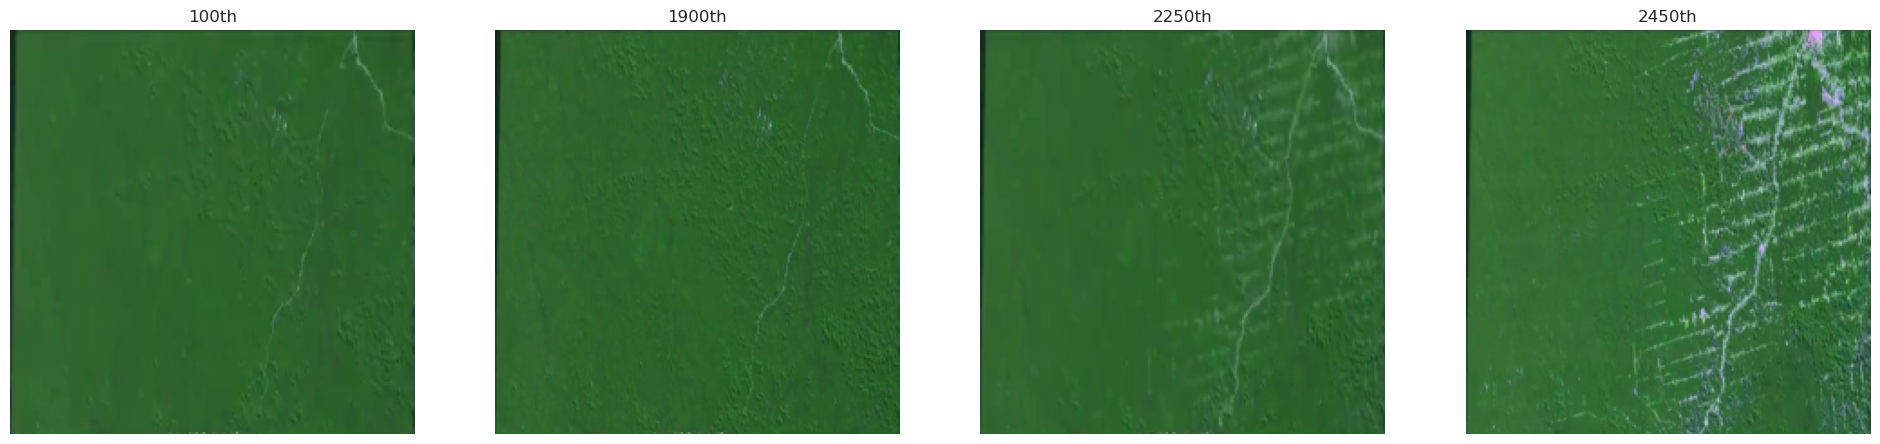

In [42]:
imgFig = plt.figure(figsize=(24, 10))
# setting values to rows and column variables
rows = 1
columns = 4

imgFig.add_subplot(rows, columns, 1)
plt.imshow(dataset[99])
plt.axis('off')
plt.title("100th")

imgFig.add_subplot(rows, columns, 2)
plt.imshow(dataset[1899])
plt.axis('off')
plt.title("1900th")

imgFig.add_subplot(rows, columns, 3)
plt.imshow(dataset[2259])
plt.axis('off')
plt.title("2250th")

imgFig.add_subplot(rows, columns, 4)
plt.imshow(dataset[2449])
plt.axis('off')
plt.title("2450th")


### SHAP exlpainers


In [43]:
!pip install shap

In [44]:
import shap

class_names = ["Anomaly"]

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(vggModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[0:1], max_evals=5000, batch_size=50,outputs=shap.Explanation.argsort.flip)

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:37, 37.67s/it]               


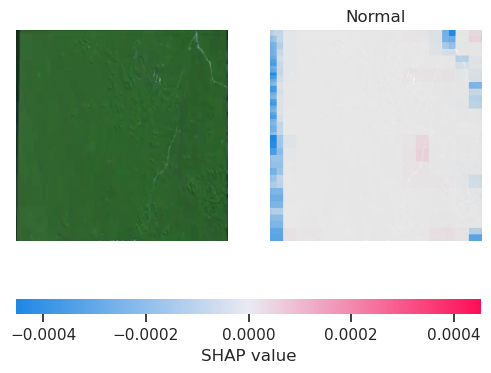

In [45]:
shap.image_plot(shap_values_fine,dataset[0:1],[["Normal"]])

### 100th Image

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:26, 26.69s/it]               


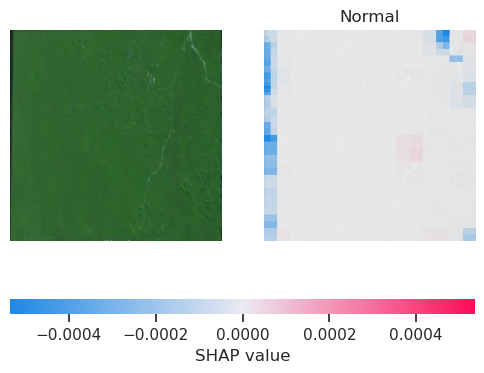

In [46]:

class_names = ["Anomaly"]

class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(vggModel, masker_blur, output_names=class_names)

  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[99:100], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])
shap.image_plot(shap_values_fine,dataset[99:100],[["Normal"]])

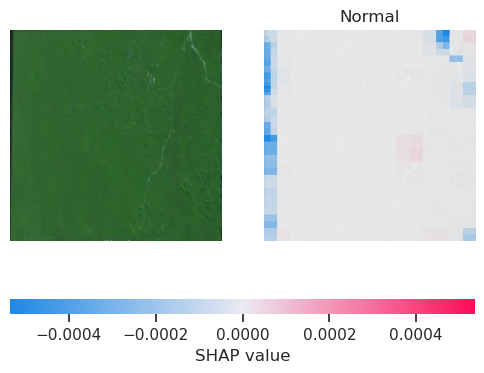

In [47]:
shap.image_plot(shap_values_fine,dataset[99:100],[["Normal"]])

### 1900th image

In [48]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(vggModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[1899:1900], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.34s/it]               


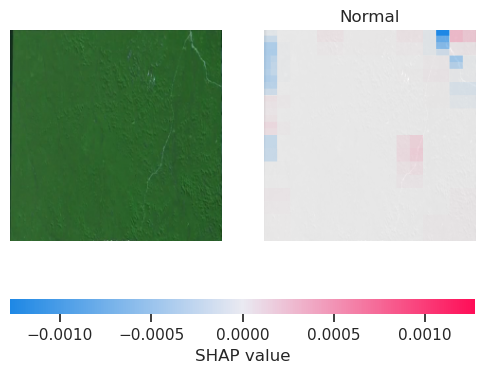

In [49]:
shap.image_plot(shap_values_fine,dataset[1900:1901],[["Normal"]])

### 2259th image

In [50]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(vggModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2258:2259], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:25, 25.55s/it]               


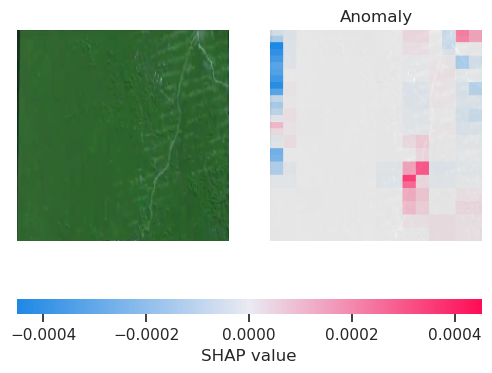

In [51]:
shap.image_plot(shap_values_fine,dataset[2258:2259],[["Anomaly"]])

### 2450th image

In [52]:
class_names= np.asarray(class_names)
masker_blur = shap.maskers.Image("blur(128,128)", dataset[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(vggModel, masker_blur, output_names=class_names)
  
# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(dataset[2449:2450], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:1])

  0%|          | 0/4998 [00:00<?, ?it/s]

Partition explainer: 2it [00:26, 26.16s/it]               


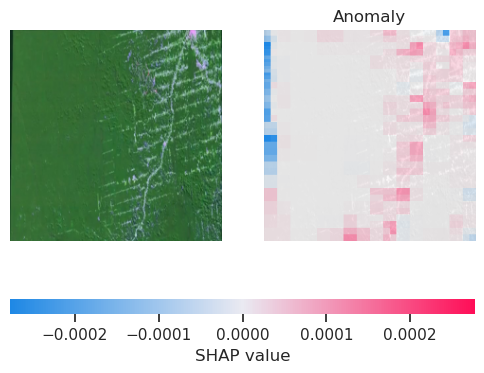

In [53]:
shap.image_plot(shap_values_fine,dataset[2449:2450],[["Anomaly"]])

In [54]:
!pip install lime

In [58]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

from lime import lime_image
from skimage.segmentation import mark_boundaries

lime_explainer = lime_image.LimeImageExplainer(feature_selection ='auto' )


#explanation = lime_explainer.explain_instance(trainX[1400].astype('double'), model.predict,  
                                         #top_labels=2, hide_color=0, num_samples=1000)
    
explanation = lime_explainer.explain_instance(dataset[1400].astype('double'), vggModel.predict)



In [59]:
explainer = lime_image.LimeImageExplainer(random_state=42)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


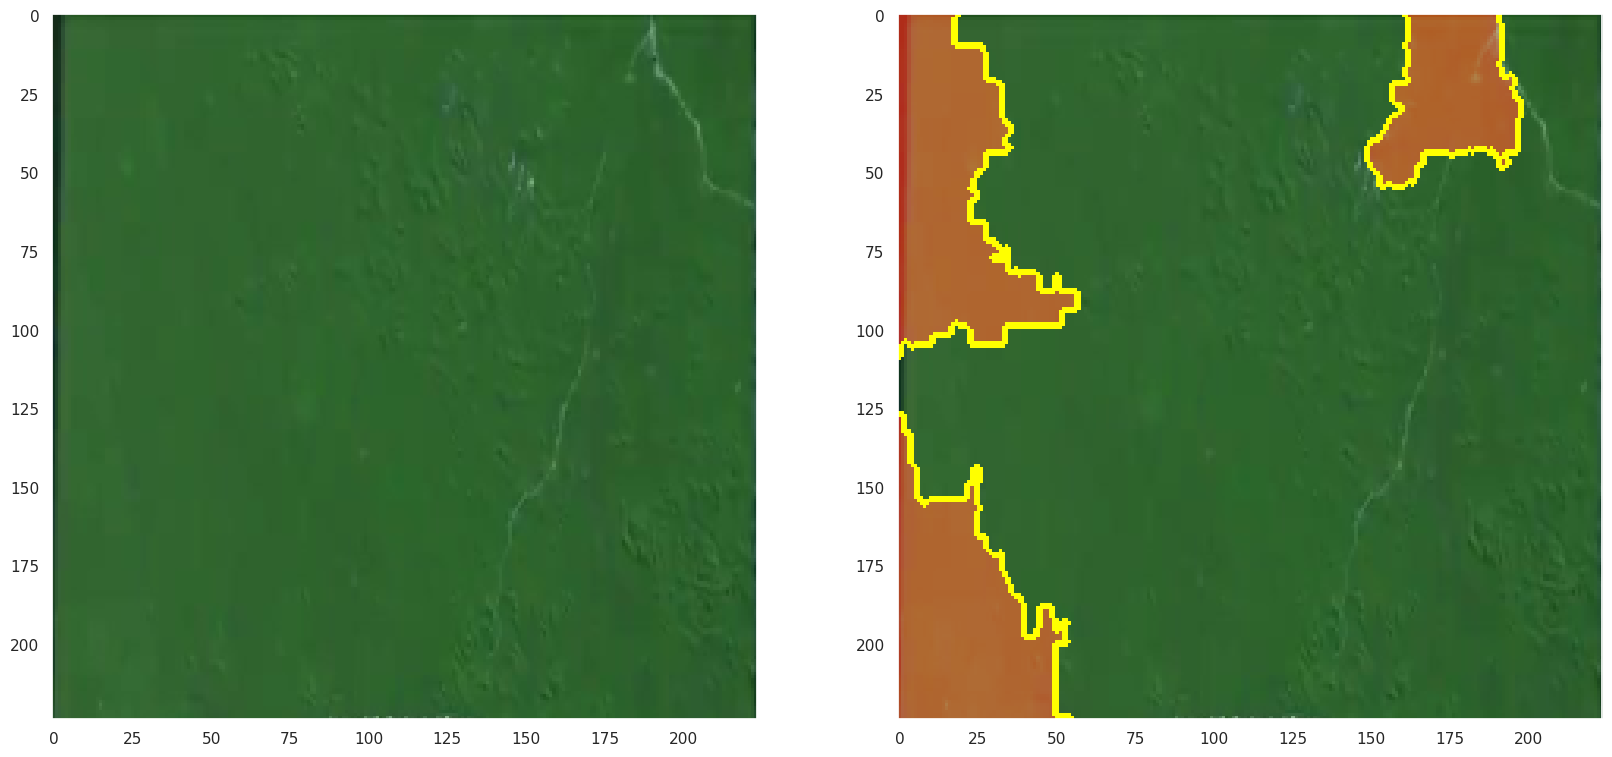

In [60]:
#100th
explanation100 = explainer.explain_instance(
         dataset[99], 
         vggModel.predict
)

image, mask = explanation100.get_image_and_mask(
         explanation100.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[99])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


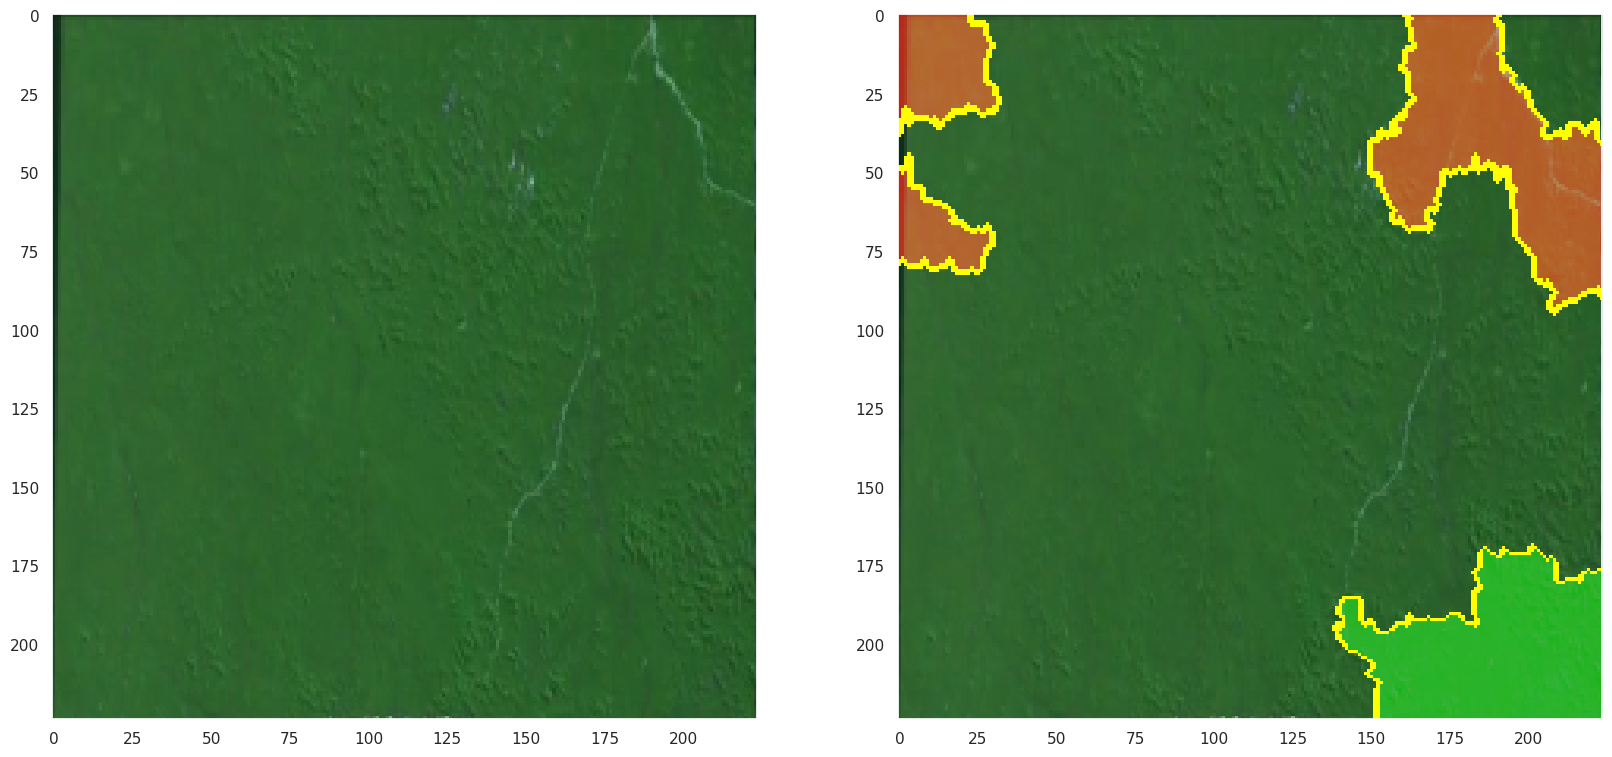

In [61]:
#1900th
explanation1900 = explainer.explain_instance(
         dataset[1899], 
         vggModel.predict
)

image, mask = explanation1900.get_image_and_mask(
         explanation1900.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[1899])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


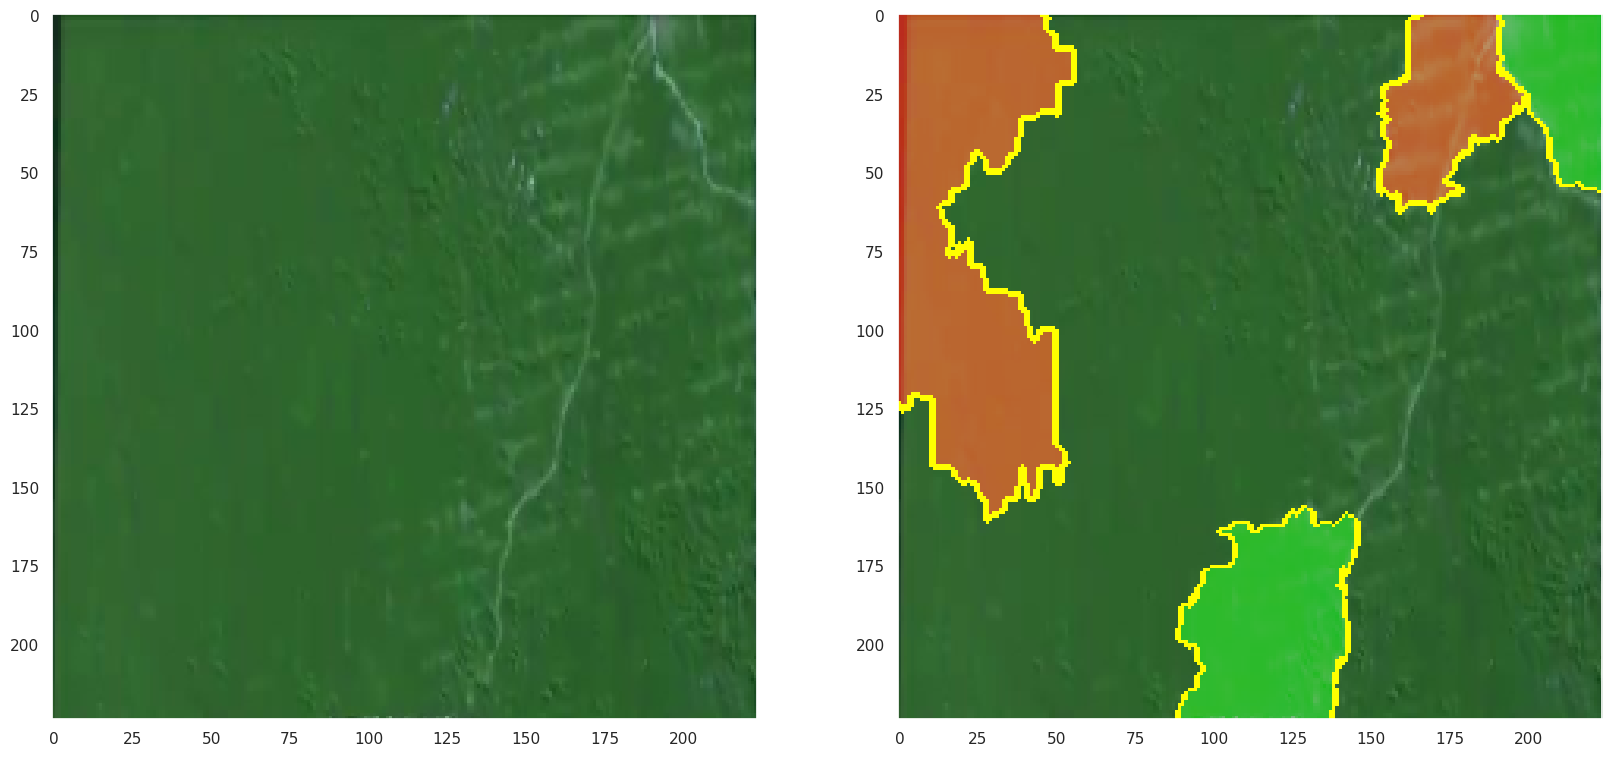

In [62]:
#2259th
explanation2259 = explainer.explain_instance(
         dataset[2258], 
         vggModel.predict
)

image, mask = explanation2259.get_image_and_mask(
         explanation2259.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2258])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


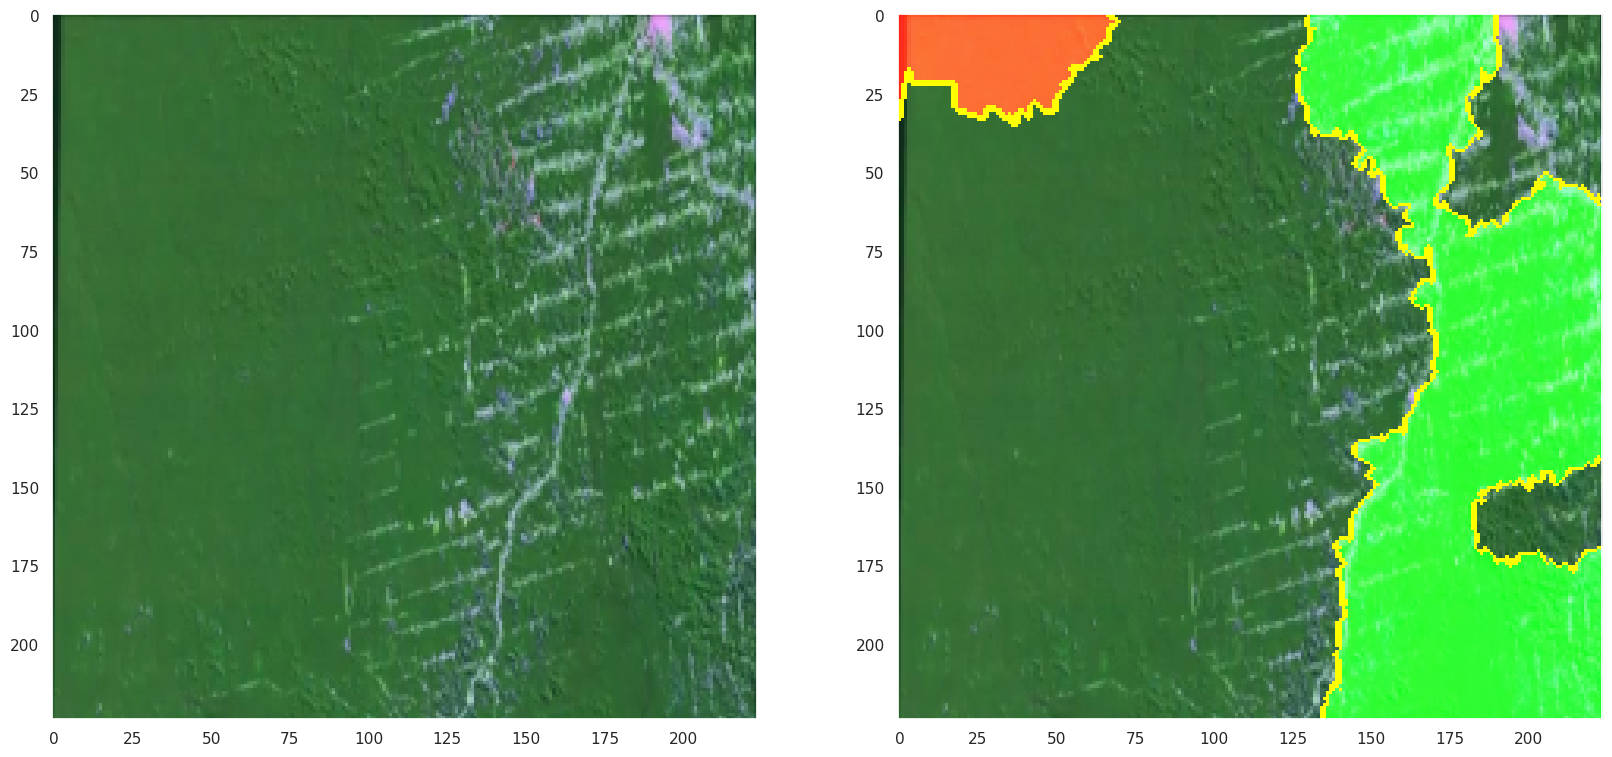

In [63]:
#2450th
explanation2450 = explainer.explain_instance(
         dataset[2449], 
         vggModel.predict
)

image, mask = explanation2450.get_image_and_mask(
         explanation2450.top_labels[0],
         positive_only=False, 
         hide_rest=False)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.grid(False)
plt.imshow(dataset[2449])
plt.subplot(1, 2, 2)
plt.grid(False)
plt.imshow(mark_boundaries(image, mask))

### LIME Explainations for various points of the dataset.

**Images selected are as follows**
1. An image from the normal behaviour :- dataset[100] 
2. An image from the normal behavour but close to the anomalous behaviour : dataset[1900]
3. An image from the anomalous behavour but close to the normal behaviour : dataset[2200]
3. An image from the anomalous behaviour: dataset[2450]